<div id="container" style="position:relative;">
<div style="float:left"><h1> Capstone Project: Sprint 1 </h1></div>
<div style="position:relative; float:right">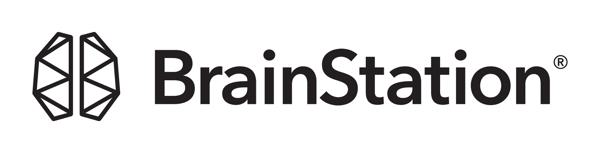
</div>
</div>


#### Author: Matt Bonadies
#### Date: 3/7/2024
#### Version: JupyterLab 3.6.3

In [228]:
# Imports all of the libraries that will be utilized throughout this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from io import StringIO
import requests

# Enables view of all columns when viewing Pandas DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Private API Key utilized in the paramater variables below to extract data
api_key = ''

**Important Note:** The API Key utilized for the Data Extraction portion of this notebook has been redacted because it is a private key. In order to run or clone any models, please utilize the sample raw data csv files found in the 'Data' folder in my BrainStation_Capstone Repository.

## Data Extraction

The information for this capstone project will be sourced from datagolf.com. This website compiles all accessible professional golf data and, through its partnership with the PGA Tour, provides access to extensive datasets. For the first sprint, we will extract data from four distinct tables to conduct our preliminary EDA. The following four code segments will provide a concise summary of each dataframe we are retrieving, setting the stage for a more detailed analysis during our EDA.

### Table 1: Historical Scoring & Statistics DataFrame
The initial code segment will fetch our primary data table via the REST API offered by datagolf. In general, this table encompasses all player scoring and statistics for each round played from 2017 to the current day.

In [229]:
# Retrieves main set of data
api_url = "https://feeds.datagolf.com/historical-raw-data/rounds"

df_list = []

for year in range (2017, 2025):
    params = {
        'tour': 'pga',
        'event_id': 'all',
        'year': year,
        'file_format': 'csv',
        'key': api_key
    }

    response = requests.get(api_url, params=params)

    if response.status_code == 200:
        # Use StringIO to convert the response content into a file-like object for read_csv
        data = StringIO(response.text)
        df = pd.read_csv(data)
        df_list.append(df)
        print(f"Data added for year: {year}")
    else:
        print("Failed to fetch data from the API. Status code:", response.status_code)

stat_df = pd.concat(df_list, ignore_index=True)

print("\nData Retrieved!")

Data added for year: 2017
Data added for year: 2018
Data added for year: 2019
Data added for year: 2020
Data added for year: 2021
Data added for year: 2022
Data added for year: 2023
Data added for year: 2024

Data Retrieved!


### Table 2: Historical Betting DataFrame
The second code block will collect all betting history related to matchup data (the specific betting type that will be the focus of the machine learning program) from the major sportsbooks in the United States, spanning from 2019 to the present.

In [230]:
# Retrieves betting data
api_url = "https://feeds.datagolf.com/historical-odds/matchups"

book_list = ['bet365',
             'betmgm',
             'caesars',
             'draftkings',
             'pointsbet',
             'pinnacle',
             'fanduel',
             'betcris',
             'betonline',
             'bovada',
             'unibet'
            ]

df_list = []

for index,book in enumerate(book_list):
    for year in range (2019,2025):
        params = {
        'tour': 'pga',
        'event_id': 'all',
        'year': year,
        'book': book,
        'odds_format': 'american' ,
        'file_format': 'csv',
        'key': api_key
        }

        response = requests.get(api_url, params=params)
        
        try:
            # Use StringIO to convert the response content into a file-like object for read_csv
            data = StringIO(response.text)
            df = pd.read_csv(data)
            df_list.append(df)
            print(f"Data added for book: {book}, year: {year}")
        except pd.errors.EmptyDataError:
            print(f"Skipping empty year: {year}, sportsbook: {book}")

bet_df = pd.concat(df_list, ignore_index=True)

print("\nData Retrieved!")

Data added for book: bet365, year: 2019
Data added for book: bet365, year: 2020
Data added for book: bet365, year: 2021
Data added for book: bet365, year: 2022
Data added for book: bet365, year: 2023
Data added for book: bet365, year: 2024
Skipping empty year: 2019, sportsbook: betmgm
Skipping empty year: 2020, sportsbook: betmgm
Data added for book: betmgm, year: 2021
Data added for book: betmgm, year: 2022
Data added for book: betmgm, year: 2023
Data added for book: betmgm, year: 2024
Skipping empty year: 2019, sportsbook: caesars
Skipping empty year: 2020, sportsbook: caesars
Skipping empty year: 2021, sportsbook: caesars
Skipping empty year: 2022, sportsbook: caesars
Data added for book: caesars, year: 2023
Data added for book: caesars, year: 2024
Data added for book: draftkings, year: 2019
Data added for book: draftkings, year: 2020
Data added for book: draftkings, year: 2021
Data added for book: draftkings, year: 2022
Data added for book: draftkings, year: 2023
Data added for boo

### Table 3: Player World Rankings DataFrame
The third code segment extracts information on the top 500 players along with their respective Official World Golf Rankings.

In [231]:
# Retrieves current Player Information and Official World Golf Ranking
api_url = "https://feeds.datagolf.com/preds/get-dg-rankings"

params = {
    'file_format': 'csv',
    'key': api_key
}

response = requests.get(api_url, params=params)

if response.status_code == 200:
    # Use StringIO to convert the response content into a file-like object for read_csv
    data = StringIO(response.text)
    rank_df = pd.read_csv(data)
else:
    print("Failed to fetch data from the API. Status code:", response.status_code)
    
print("Data Retrieved!")

Data Retrieved!


### Table 4: Course Statistics DataFrame
The fourth and final table we intend to use contains a statistical overview of most courses featured on the PGA Tour. This table lacks an associated API and was directly downloaded from the website.

In [232]:
course_df = pd.read_csv("data/course_stats_data.csv")
print("Data Retrieved!")

Data Retrieved!


## Understanding Our DataFrames

### Table 1: Historical Scoring & Statistics DataFrame

In [233]:
# Outputs the shape of our dataframe
print(f'There are {stat_df.shape[0]} rows and {stat_df.shape[1]} columns in the DataFrame.')

There are 128861 rows and 30 columns in the DataFrame.


In [234]:
# Takes a look into the data
stat_df.head()

,tour,year,season,event_completed,event_name,event_id,player_name,dg_id,fin_text,round_num,course_name,course_num,course_par,start_hole,teetime,round_score,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,driving_dist,driving_acc,gir,scrambling,prox_rgh,prox_fw,great_shots,poor_shots
0,pga,2017,2017,2017-01-08,SBS Tournament of Champions,16,"Herman, Jim",12846,T12,1,Plantation Course at Kapalua,656,73,1,11:20am,67.0,1.248,-0.605,2.353,0.347,2.095,3.344,292.8,0.867,0.889,0.667,27.051,21.601,3.0,2.0
1,pga,2017,2017,2017-01-08,SBS Tournament of Champions,16,"Gomez, Fabian",8571,20,1,Plantation Course at Kapalua,656,73,1,11:30am,70.0,1.832,0.357,-1.338,-0.507,-1.489,0.344,281.6,0.733,0.722,0.625,70.450,40.227,4.0,1.0
2,pga,2017,2017,2017-01-08,SBS Tournament of Champions,16,"Knox, Russell",13831,T17,4,Plantation Course at Kapalua,656,73,1,9:35am,73.0,0.885,0.378,-1.844,-1.294,-2.760,-1.875,288.2,0.533,0.778,0.500,28.339,33.636,1.0,6.0
3,pga,2017,2017,2017-01-08,SBS Tournament of Champions,16,"Knox, Russell",13831,T17,3,Plantation Course at Kapalua,656,73,1,9:55am,68.0,1.068,-0.249,0.918,0.200,0.870,1.938,290.6,0.933,0.944,0.600,NaN,27.122,1.0,1.0
4,pga,2017,2017,2017-01-08,SBS Tournament of Champions,16,"Knox, Russell",13831,T17,2,Plantation Course at Kapalua,656,73,1,11:10am,69.0,1.211,1.257,-1.412,0.037,-0.118,1.094,282.6,0.933,0.667,1.000,26.804,39.292,2.0,4.0


In [235]:
# Pulls all information related to the columns including the name, count of non-null values in each, and the data type
stat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128861 entries, 0 to 128860
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tour             128861 non-null  object 
 1   year             128861 non-null  int64  
 2   season           128861 non-null  int64  
 3   event_completed  128861 non-null  object 
 4   event_name       128861 non-null  object 
 5   event_id         128861 non-null  int64  
 6   player_name      128861 non-null  object 
 7   dg_id            128861 non-null  int64  
 8   fin_text         128861 non-null  object 
 9   round_num        128861 non-null  int64  
 10  course_name      128861 non-null  object 
 11  course_num       128861 non-null  int64  
 12  course_par       128861 non-null  int64  
 13  start_hole       128861 non-null  int64  
 14  teetime          128861 non-null  object 
 15  round_score      128401 non-null  float64
 16  sg_putt          102100 non-null  floa

It appears we have some Null values, so let's look into them.

In [236]:
# Checks for null values in the dataframe
stat_df.isna().sum()

tour                   0
year                   0
season                 0
event_completed        0
event_name             0
event_id               0
player_name            0
dg_id                  0
fin_text               0
round_num              0
course_name            0
course_num             0
course_par             0
start_hole             0
teetime                0
round_score          460
sg_putt            26761
sg_arg             26761
sg_app             26761
sg_ott             26761
sg_t2g             26761
sg_total               0
driving_dist       16645
driving_acc        12554
gir                15199
scrambling         28489
prox_rgh           31310
prox_fw            28445
great_shots        28445
poor_shots         28445
dtype: int64

**Data Quality Issues:**
- The null values are a result of not all courses on the PGA Tour having detailed shot statistics which is important to our modeling. For the sake of initial EDA, we are going to drop these rows since they are a minority of the data but we may choose to impute with means or medians later on in our model building.

**Feature Engineering:**
- Calculate the amount under/over par a score is utilizing the course_par and round_score columns
- Dumifying the teetime column to potentially make it binary for morning and afternoon tee times
- Calculating the specific date of each round based on the event_completed column
- Adjust the way ties are displayed, by removing the preceeding T's, in the fin_text column so all values are numeric

Since we have a date column, let's convert it from object to datetime in case we want to utilize it.

In [237]:
# Create a properly formatted data column
stat_df['Date'] = stat_df['event_completed'].astype('datetime64[ns]')

In [238]:
# Confirms that the new date column has been converted
stat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128861 entries, 0 to 128860
Data columns (total 31 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   tour             128861 non-null  object        
 1   year             128861 non-null  int64         
 2   season           128861 non-null  int64         
 3   event_completed  128861 non-null  object        
 4   event_name       128861 non-null  object        
 5   event_id         128861 non-null  int64         
 6   player_name      128861 non-null  object        
 7   dg_id            128861 non-null  int64         
 8   fin_text         128861 non-null  object        
 9   round_num        128861 non-null  int64         
 10  course_name      128861 non-null  object        
 11  course_num       128861 non-null  int64         
 12  course_par       128861 non-null  int64         
 13  start_hole       128861 non-null  int64         
 14  teetime          128

In [239]:
# Removes null rows
stat_df = stat_df.dropna(axis=0)

In [240]:
# Verifies that the null rows have been removed
stat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97509 entries, 0 to 128859
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tour             97509 non-null  object        
 1   year             97509 non-null  int64         
 2   season           97509 non-null  int64         
 3   event_completed  97509 non-null  object        
 4   event_name       97509 non-null  object        
 5   event_id         97509 non-null  int64         
 6   player_name      97509 non-null  object        
 7   dg_id            97509 non-null  int64         
 8   fin_text         97509 non-null  object        
 9   round_num        97509 non-null  int64         
 10  course_name      97509 non-null  object        
 11  course_num       97509 non-null  int64         
 12  course_par       97509 non-null  int64         
 13  start_hole       97509 non-null  int64         
 14  teetime          97509 non-null  object   

Now that our data has been cleaned, we will conduct our initial EDA of the main dataset below. We will start with an overview utilizing the Seaborn Pairplot function on our pertinent numeric columns.

/Users/matthewbonadies/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/matthewbonadies/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


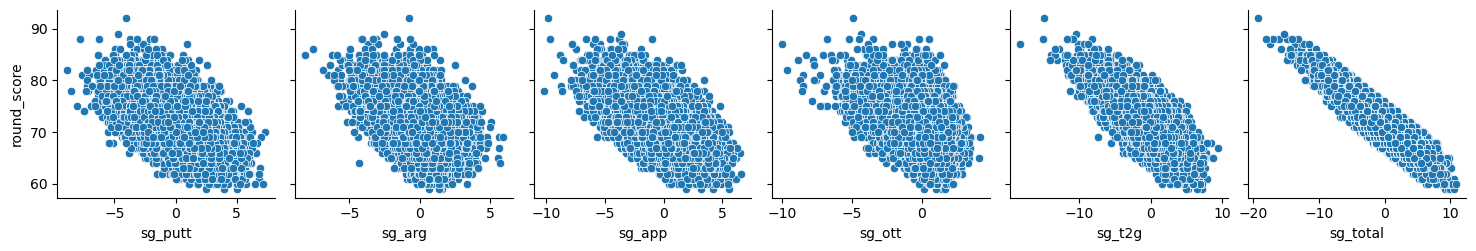

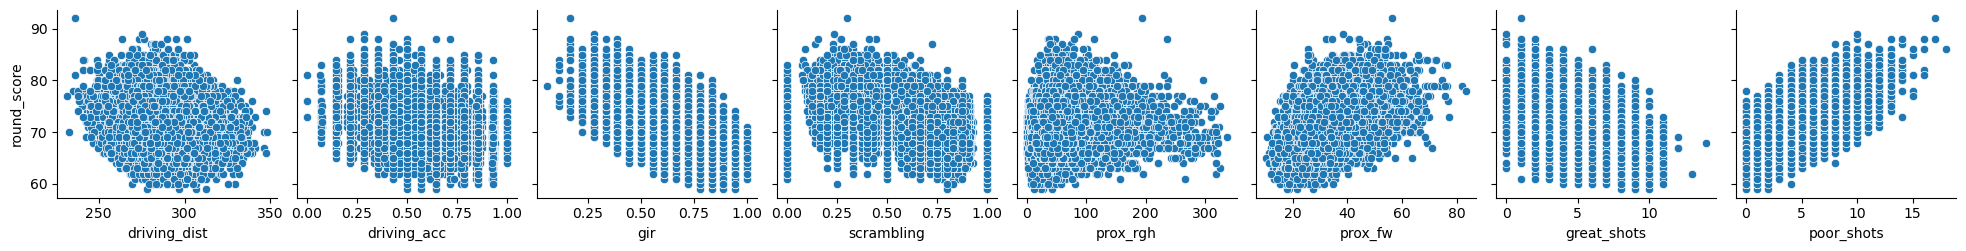

In [241]:
# Creates Seaborn Pairplots to visualize potential relationships
sg_cols = ['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']
t_cols = ['driving_dist', 'driving_acc', 'gir', 'scrambling', 'prox_rgh', 'prox_fw', 'great_shots', 'poor_shots']

sns.pairplot(data=stat_df, x_vars=sg_cols, y_vars='round_score')
sns.pairplot(data=stat_df, x_vars=t_cols, y_vars='round_score')

Based on the above pairplots, we can start to visualize the linear relationship between the different statistics tracked and how they relate to a players score. As we can see above, an increase in the positive stats has a negative relationship with round score because the lower the score is, the better it is in golf. We will further analyze graphs that will be incorporated into the Sprint 1 presentation below.

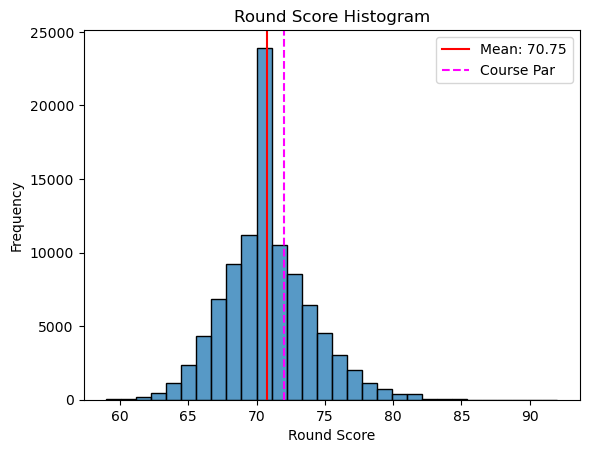

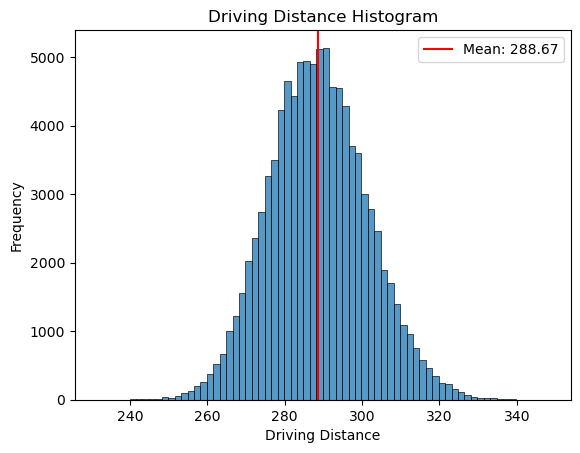

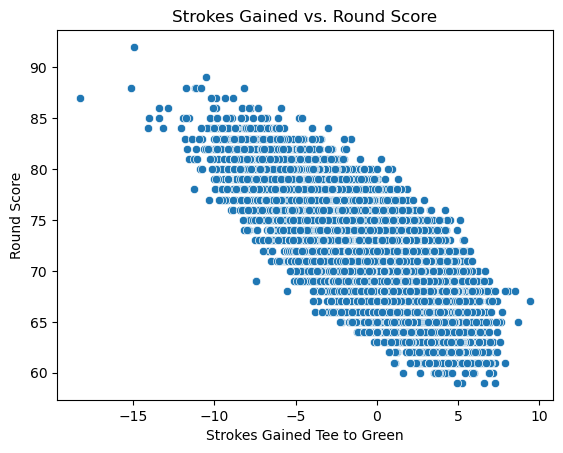

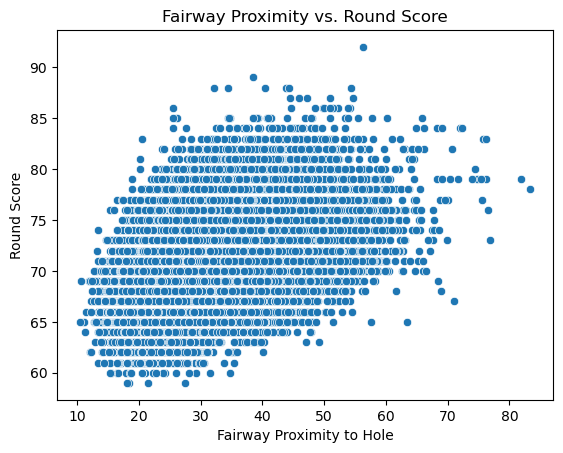

In [242]:
# Creates histograms and scatterplots for the Sprint 1 Presentation
sns.histplot(stat_df,x='round_score', bins=30)
score_mean = stat_df['round_score'].mean()
plt.axvline(score_mean, color='red', label=f'Mean: {score_mean.round(2)}')
plt.axvline(72, color='magenta', label= 'Course Par', linestyle = '--')
plt.xlabel('Round Score')
plt.ylabel('Frequency')
plt.legend()
plt.title('Round Score Histogram')
plt.savefig('Round Score Histogram.png')
plt.show()

sns.histplot(stat_df,x='driving_dist', bins=70)
dist_mean = stat_df['driving_dist'].mean()
plt.axvline(dist_mean, color='red', label=f'Mean: {dist_mean.round(2)}')
plt.xlabel('Driving Distance')
plt.ylabel('Frequency')
plt.legend()
plt.title('Driving Distance Histogram')
plt.savefig('Driving Distance Histogram.png')
plt.show()

sns.scatterplot(stat_df,x='sg_t2g', y='round_score')
plt.xlabel('Strokes Gained Tee to Green')
plt.ylabel('Round Score')
plt.title('Strokes Gained vs. Round Score')
plt.savefig('Strokes Gained vs. Round Score.png')
plt.show()

sns.scatterplot(stat_df,x='prox_fw', y='round_score')
plt.xlabel('Fairway Proximity to Hole')
plt.ylabel('Round Score')
plt.title('Fairway Proximity vs. Round Score')
plt.savefig('Fairway Proximity vs. Round Score.png')
plt.show()

We've provided 4 important charts above that help us understand our data a bit more.
1. The first chart allows us to see the score distribution across all years of our dataset. It's clear that the mean is below the typical course par given that professional golfers tend to shoot under par more often than even or over par.
2. The second chart allows us to see the difference in driving distances. For the entire dataset, it appears the average driving distance is around 290 yards, but it will be interesting to investigate this further and break it down by year to determine if there are noticeable differences from technology.
3. The third chart shows the relationship between Strokes Gained (A metric that measures a golfers performance to the average professional) and Round Score. It is clear there is a negative relationship which logically makes sense because a golfer that performs better than the average in all aspects of their game should score lower.
4. The final chart shows the relationship between the distance to the hole on an approach shot and a players' final score. Here, we see a slightly positive trend because as the shot is farther away from the hole we can expect to see higher scores.
Lastly, we will provide a heatmap below to visualize these correlations in numeric form.

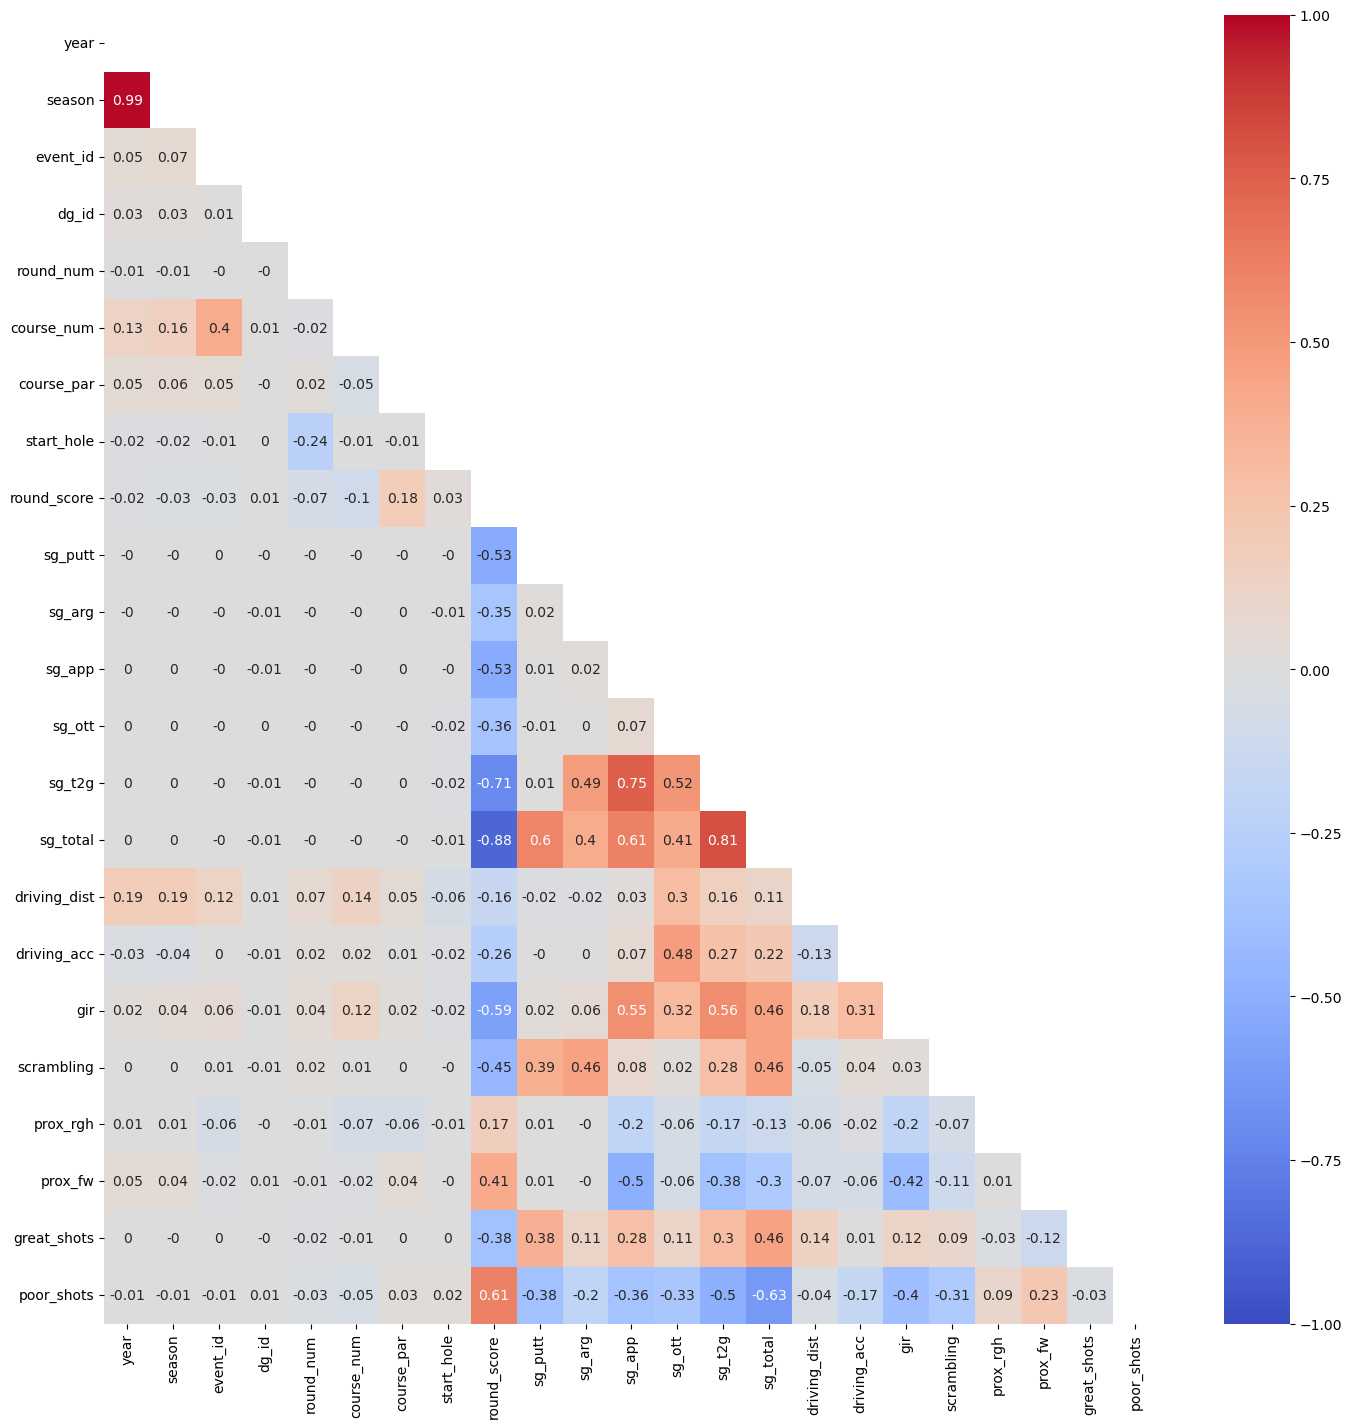

In [244]:
# Creates heatmap to analyze potential correlations
num_stat_df = stat_df.select_dtypes("number")
corr_df = num_stat_df.corr()
mask = np.triu(corr_df)
plt.figure(figsize=(17,17))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.savefig('Heatmap.png')
plt.show()

Now, we can see the numeric representation of correlations which will be beneficial as we begin modeling in our next sprint!

### Table 2: Historical Betting DataFrame

In [247]:
# Outputs the shape of our dataframe
print(f'There are {bet_df.shape[0]} rows and {bet_df.shape[1]} columns in the DataFrame.')

There are 266941 rows and 28 columns in the DataFrame.


In [248]:
# Takes a look into the data
bet_df.head()

,p3_outcome_text,p3_close,p3_player_name,p2_outcome_text,p2_outcome,close_time,bet_type,p1_outcome_text,p3_open,p2_open,p3_dg_id,p1_outcome,tie_rule,p2_close,p1_open,p2_dg_id,p3_outcome,p1_dg_id,p1_player_name,open_time,p2_player_name,p1_close,book,event_completed,event_name,season,year,event_id
0,loss,333.0,"Niemann, Joaquin",loss,0.0,2019-03-29 04:59,R2 3-Ball,win,333.0,162,18079.0,1.0,Ties settled by dead-heat rules,162,105,11357,0.0,6252,"Baddeley, Aaron",2019-03-28 22:06,"Uihlein, Peter",105,bet365,2019-03-31,Corales Puntacana Resort & Club Championship,2019,2019,522
1,win,225.0,"Bozzelli, Dominic",loss,0.0,2019-03-29 04:59,R2 3-Ball,loss,225.0,175,17564.0,0.0,Ties settled by dead-heat rules,175,137,14815,1.0,10185,"Every, Matt",2019-03-28 22:06,"Lingmerth, David",137,bet365,2019-03-31,Corales Puntacana Resort & Club Championship,2019,2019,522
2,loss,187.0,"Sloan, Roger",loss,0.0,2019-03-29 04:59,R2 3-Ball,win,187.0,187,14050.0,1.0,Ties settled by dead-heat rules,187,150,12909,0.0,11955,"Frittelli, Dylan",2019-03-28 22:06,"Campos, Rafael",150,bet365,2019-03-31,Corales Puntacana Resort & Club Championship,2019,2019,522
3,loss,200.0,"Schenk, Adam",loss,0.0,2019-03-29 04:59,R2 3-Ball,win,200.0,150,19477.0,1.0,Ties settled by dead-heat rules,150,175,17511,0.0,14181,"Detry, Thomas",2019-03-28 22:06,"Straka, Sepp",175,bet365,2019-03-31,Corales Puntacana Resort & Club Championship,2019,2019,522
4,win,187.0,"Garnett, Brice",loss,0.0,2019-03-29 04:59,R2 3-Ball,loss,187.0,125,11451.0,0.0,Ties settled by dead-heat rules,125,225,7398,1.0,3464,"Love III, Davis",2019-03-28 22:06,"Schwartzel, Charl",225,bet365,2019-03-31,Corales Puntacana Resort & Club Championship,2019,2019,522


In [249]:
# Pulls all information related to the columns including the name, count of non-null values in each, and the data type
bet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266941 entries, 0 to 266940
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p3_outcome_text  94019 non-null   object 
 1   p3_close         94019 non-null   float64
 2   p3_player_name   94019 non-null   object 
 3   p2_outcome_text  266941 non-null  object 
 4   p2_outcome       266941 non-null  float64
 5   close_time       266941 non-null  object 
 6   bet_type         266941 non-null  object 
 7   p1_outcome_text  266941 non-null  object 
 8   p3_open          94019 non-null   float64
 9   p2_open          266941 non-null  int64  
 10  p3_dg_id         94019 non-null   float64
 11  p1_outcome       266941 non-null  float64
 12  tie_rule         266941 non-null  object 
 13  p2_close         266941 non-null  int64  
 14  p1_open          266941 non-null  int64  
 15  p2_dg_id         266941 non-null  int64  
 16  p3_outcome       94019 non-null   floa

**Data Quality Issues:**
- The null values in this DataFrame are result of the availability of different types of bets, not necessarily missing data. There are some bets where 2 players are matched up against each other and others where 3 players are matched up against each other. This results in null values for the third player when the bet type is a match up between 2 individuals. For right now, we are going to filter for 2 person matchups and remove columns beginning with p3 because we only want to focus on head-to-head matchups.

**Feature Engineering:**
- We need to create a distinct column that allows us to join onto our main data table.

In [250]:
# Finding the available bet types
bet_df['bet_type'].value_counts()

bet_type
72-hole Match    49984
R4 Match-Up      39470
R3 Match-Up      38918
R1 Match-Up      36806
R2 Match-Up      32864
R1 3-Ball        28788
R2 3-Ball        26447
R4 3-Ball         6901
R3 3-Ball         6763
Name: count, dtype: int64

In [251]:
# Creating a filtered dataframe for only the bet types we want
filtered_df = bet_df[(bet_df['bet_type'] == '72-hole Match') 
       | (bet_df['bet_type'] == 'R4 Match-Up') 
       | (bet_df['bet_type'] == 'R3 Match-Up')
       | (bet_df['bet_type'] == 'R1 Match-Up') 
       | (bet_df['bet_type'] == 'R2 Match-Up')
      ]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198042 entries, 22 to 266940
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p3_outcome_text  25120 non-null   object 
 1   p3_close         25120 non-null   float64
 2   p3_player_name   25120 non-null   object 
 3   p2_outcome_text  198042 non-null  object 
 4   p2_outcome       198042 non-null  float64
 5   close_time       198042 non-null  object 
 6   bet_type         198042 non-null  object 
 7   p1_outcome_text  198042 non-null  object 
 8   p3_open          25120 non-null   float64
 9   p2_open          198042 non-null  int64  
 10  p3_dg_id         25120 non-null   float64
 11  p1_outcome       198042 non-null  float64
 12  tie_rule         198042 non-null  object 
 13  p2_close         198042 non-null  int64  
 14  p1_open          198042 non-null  int64  
 15  p2_dg_id         198042 non-null  int64  
 16  p3_outcome       25120 non-null   float64


In [252]:
# Pulls remaining values in the 'p3' columns to determine what is left
filtered_df['p3_player_name'].value_counts()

p3_player_name
Halve    25120
Name: count, dtype: int64

In [253]:
# Removes the p3 columns because all necessary rows were removed and the 'Halve' values remaining do not have meaning
col_del = [col for col in filtered_df.columns if col.startswith('p3')] # Loop through columns starting with 'trap' to create a list of columns to drop
filtered_df.drop(col_del, axis=1, inplace=True) # Drop 'p3' columns

/var/folders/v_/6t_lr7fd57703dfgsj3k_p9h0000gn/T/ipykernel_9575/2807217908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(col_del, axis=1, inplace=True) # Drop 'p3' columns


In [254]:
# Checks info for the clean dataframe
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198042 entries, 22 to 266940
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p2_outcome_text  198042 non-null  object 
 1   p2_outcome       198042 non-null  float64
 2   close_time       198042 non-null  object 
 3   bet_type         198042 non-null  object 
 4   p1_outcome_text  198042 non-null  object 
 5   p2_open          198042 non-null  int64  
 6   p1_outcome       198042 non-null  float64
 7   tie_rule         198042 non-null  object 
 8   p2_close         198042 non-null  int64  
 9   p1_open          198042 non-null  int64  
 10  p2_dg_id         198042 non-null  int64  
 11  p1_dg_id         198042 non-null  int64  
 12  p1_player_name   198042 non-null  object 
 13  open_time        198042 non-null  object 
 14  p2_player_name   198042 non-null  object 
 15  p1_close         198042 non-null  int64  
 16  book             198042 non-null  object 


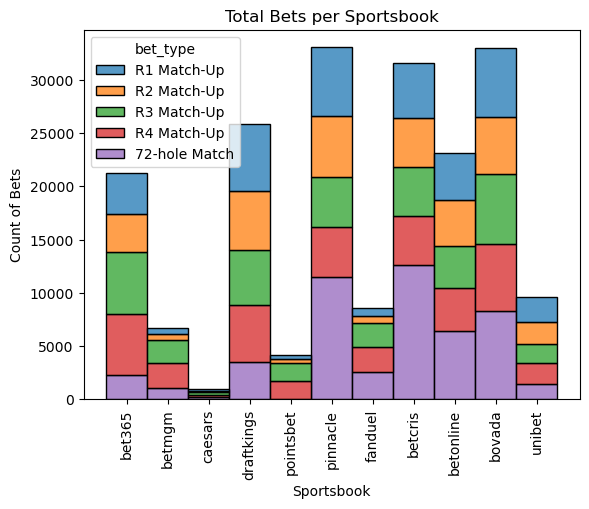

In [255]:
# Creates a stacked bar chart of bets by book and type
plt.figure()
sns.histplot(data=filtered_df, x='book', hue='bet_type', multiple="stack")
plt.xlabel('Sportsbook')
plt.ylabel('Count of Bets')
plt.title('Total Bets per Sportsbook')
plt.xticks(rotation=90)
plt.show()

For preliminary EDA, we can use the above histplot to see the total amount of bets since 2019 by sportsbook broken down by the type within each bar. This information will be more useful when we merge this data with our main scoring and statistics dataframe.

### Table 3: Player World Rankings DataFrame

In [256]:
rank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        500 non-null    object 
 1   dg_id              500 non-null    int64  
 2   country            500 non-null    object 
 3   am                 500 non-null    int64  
 4   primary_tour       500 non-null    object 
 5   datagolf_rank      500 non-null    int64  
 6   owgr_rank          500 non-null    int64  
 7   dg_skill_estimate  500 non-null    float64
 8   last_updated       500 non-null    object 
 9   notes              500 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 39.2+ KB


In [257]:
rank_df.head(10)

,player_name,dg_id,country,am,primary_tour,datagolf_rank,owgr_rank,dg_skill_estimate,last_updated,notes
0,"Scheffler, Scottie",18417,USA,0,PGA,1,1,2.408058,2024-03-04 18:44:17 UTC,anyone ranked outside top 500 in OWGR appear a...
1,"Schauffele, Xander",19895,USA,0,PGA,2,5,2.032248,2024-03-04 18:44:17 UTC,anyone ranked outside top 500 in OWGR appear a...
2,"McIlroy, Rory",10091,NIR,0,PGA,3,2,1.906336,2024-03-04 18:44:17 UTC,anyone ranked outside top 500 in OWGR appear a...
3,"Rahm, Jon",19195,ESP,0,PGA,4,3,1.887334,2024-03-04 18:44:17 UTC,anyone ranked outside top 500 in OWGR appear a...
4,"Hovland, Viktor",18841,NOR,0,PGA,5,4,1.865097,2024-03-04 18:44:17 UTC,anyone ranked outside top 500 in OWGR appear a...
5,"Cantlay, Patrick",15466,USA,0,PGA,6,6,1.792671,2024-03-04 18:44:17 UTC,anyone ranked outside top 500 in OWGR appear a...
6,"Morikawa, Collin",22085,USA,0,PGA,7,14,1.759479,2024-03-04 18:44:17 UTC,anyone ranked outside top 500 in OWGR appear a...
7,"Fleetwood, Tommy",12294,ENG,0,PGA,8,12,1.507797,2024-03-04 18:44:17 UTC,anyone ranked outside top 500 in OWGR appear a...
8,"Burns, Sam",19483,USA,0,PGA,9,18,1.502455,2024-03-04 18:44:17 UTC,anyone ranked outside top 500 in OWGR appear a...
9,"Aberg, Ludvig",23950,SWE,0,PGA,10,11,1.442461,2024-03-04 18:44:17 UTC,anyone ranked outside top 500 in OWGR appear a...


The World Ranking table does not warrant any visualization at this step of the process. In order to extract any potential insights, we will merge it with our main dataframe. We retrieved this data in case we wanted to utilize it later down the road, but it may provide no additional benefit.

### Table 4: Course Statistics DataFrame

In [258]:
course_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   course                88 non-null     object 
 1   par                   88 non-null     int64  
 2   yardage               88 non-null     int64  
 3   yardage_4_5           88 non-null     int64  
 4   yardage_3             88 non-null     int64  
 5   adj_score_to_par      88 non-null     float64
 6   adj_par_3_score       88 non-null     float64
 7   adj_par_4_score       88 non-null     float64
 8   adj_par_5_score       88 non-null     float64
 9   adj_driving_distance  88 non-null     float64
 10  adj_sd_distance       88 non-null     float64
 11  adj_driving_accuracy  88 non-null     float64
 12  putt_sg               88 non-null     float64
 13  arg_sg                88 non-null     float64
 14  app_sg                88 non-null     float64
 15  ott_sg                88 

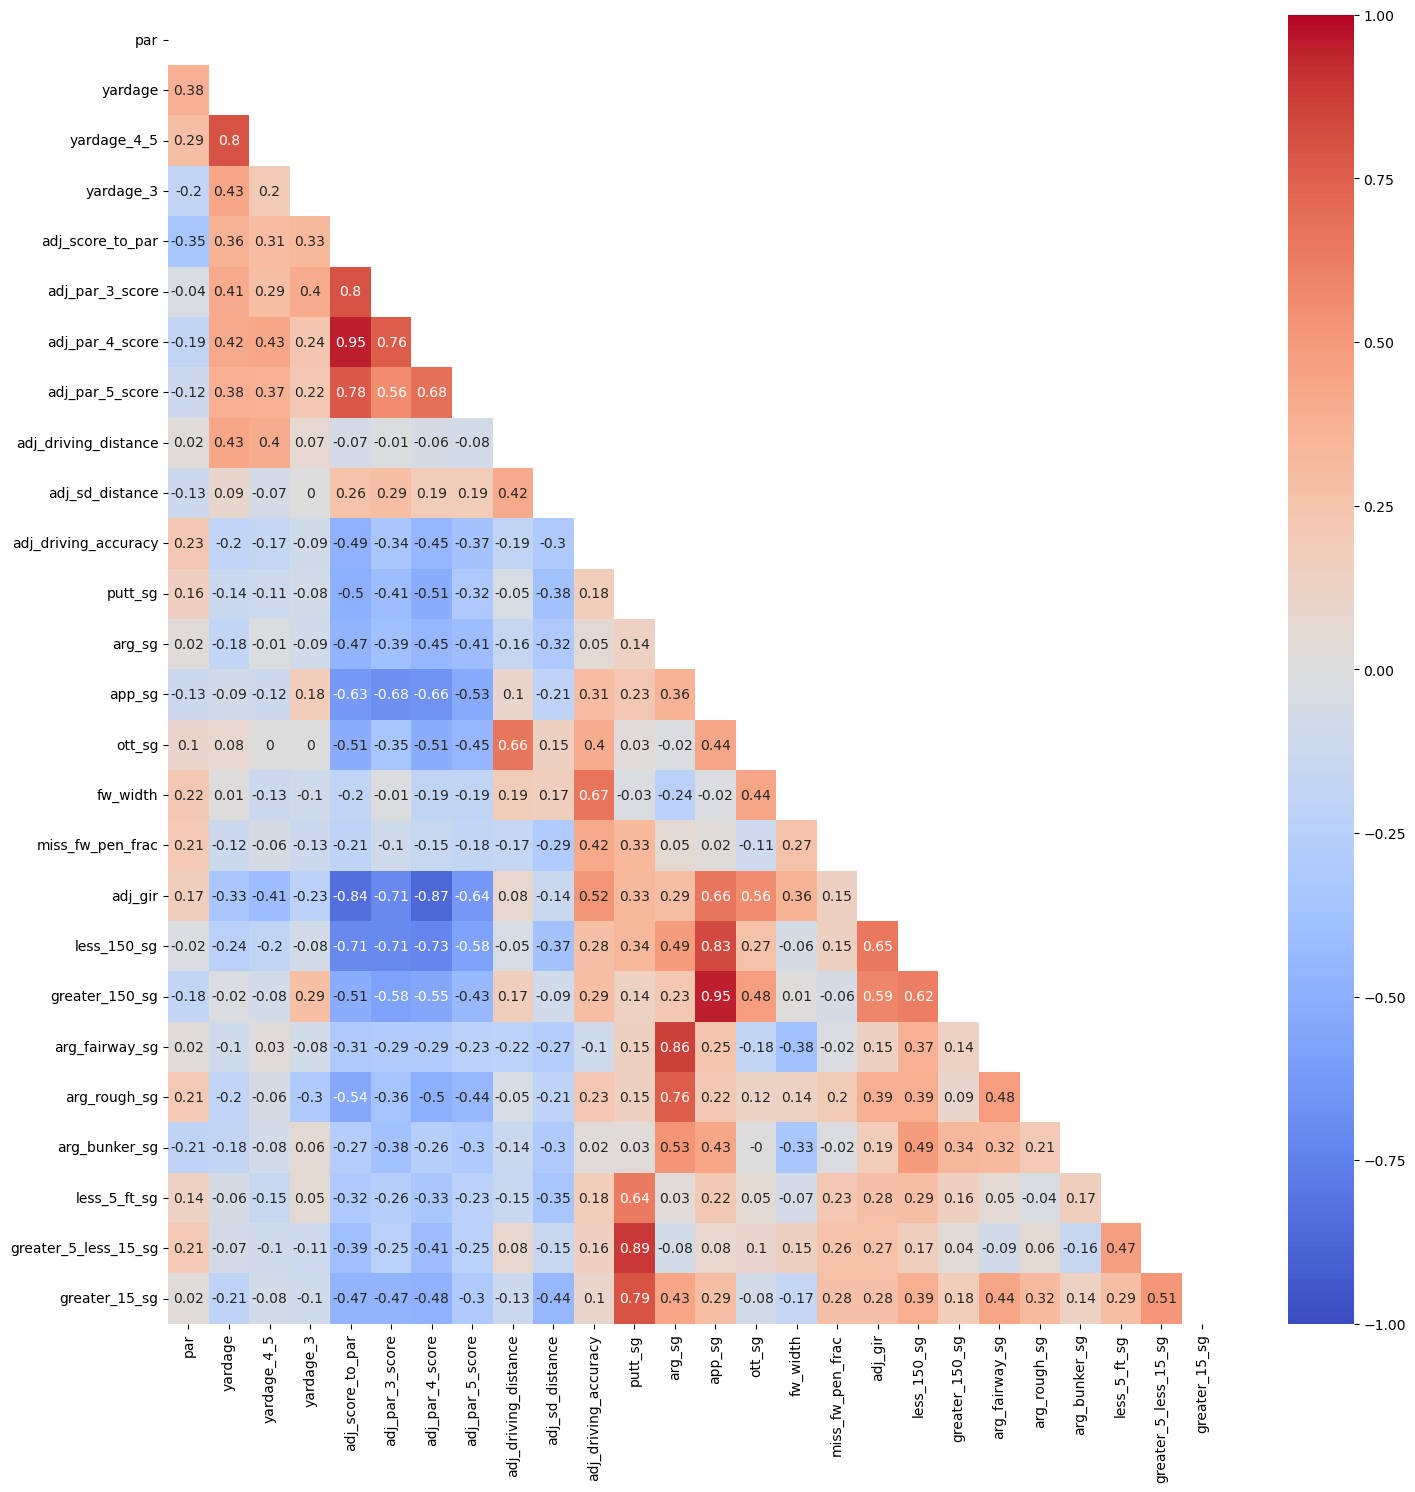

In [259]:
# Creates heatmap to analyze potential correlations
num_course_df = course_df.select_dtypes("number")
corr_df = num_course_df.corr()
mask = np.triu(corr_df)
plt.figure(figsize=(17,17))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

Our final course table has the potential to provide our model with important information that could explain certain performances due to the fact that different courses play to different strengths of players. We've provided a heatmap to see the correlation between these course statistics but similarly to the 3rd table, we will most likely be able to extract better insights once the table is merged onto our main dataframe.

In [260]:
# Export Cleaned Data
stat_df.to_csv("player_stat_data_cleaned.csv")
filtered_df.to_csv("bet_data_cleaned.csv")
rank_df.to_csv("player_rank_data_cleaned.csv")
course_df.to_csv("course_data_cleaned.csv")

## Sprint 1 Conclusion

After looking at the various data tables we have at our disposal, it is clear that golf is a statistic heavy sport with many correlating variables that could be beneficial to feed into a machine learning model. We were able to do a first pass of data cleaning to mitigate data quality issues in addition to visualizing relationships and pointing out potential features we can engineer. We will take the next steps of engineering these features as well as combining the proper information across dataframes in order to start our model iteration process for the next sprint. Finally, this notebook intended to share the statistical breakdown and preliminary EDA of this machine learning process but does require knowledge of golf statistics to fully grasp so please be sure to reference the additional resources on my github in order to better understand the terminology.

## Citations:
#### ChatGPT Prompts:
- How would I read data from an API with the following structure into a Pandas DataFrame? https://feeds.datagolf.com/historical-raw-data/rounds?tour=[ tour ]&event_id=[ event_id ]&year=[ year ]&file_format=[ file_format ]
- How would I modify the code to pull the data in CSV format and load it into a Pandas DataFrame?
- How do I expand a Pandas DataFrame to view all columns and rows?
- How would I loop over the following error? EmptyDataError: No columns to parse from file?